<a href="https://colab.research.google.com/github/ssanudo/ProcesamDigImagTP/blob/main/TP6/PDI_TP6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolución discreta: 

Es una transformación en la que el valor del píxel resultante es una combinación lineal de los valores de los píxeles vecinos en la imagen. Ejemplo. El filtro de la media es una convolución.
 R(x,y):= 1/4·A(x-1,y-1) + 1/4·A(x,y-1) + 1/4·A(x-1,y) + 1/4·A(x,y) 
 Otra forma de ver la convolución: Matriz de coeficientes de la combinación lineal. (x-1,y-1) (x,y-1) (x-1,y) (x,y)

**Definición:** 
Sean y dos matrices $A$ y $B$ de tamaño $m x n$ y $p x q$. Entonces la convolución de $A$ por $B$, definida como es la matriz $C = A ∗ B$
de tamaño $(m + p − 1) x  (n + q − 1)$, tal que
$C(i, j) = [A \ast B](i, j) = \sum_{r} \sum_{s}A(r, s) \ast B\left (i-r+1, j-s+1  \right )$

donde $r \epsilon \left  \{ \max(1,i-p+1),...,min(i,m) \right \} $ y $s \epsilon \left  \{ max(1, j-q+1),...,min(j,n)\right \}$ 

 
En procesamiento de imágenes, es común que las dimensiones de la matriz sean impares (en la mayoría de los casos, el tamaño es de $3x3$.
La matriz se conoce como *kernel*. También se le llama *filtro de convolución*.

## Filtrado de Imágenes
Los filtros son operaciones que se aplican a los píxeles de una imagen para optimizarla, enfatizar cierta información o conseguir un
efecto especial en ella.
Los principales objetivos que se persiguen con la aplicación de filtros son:
* Suavizar la imagen: reducir la cantidad de variaciones de intensidad entre píxeles vecinos.
* Eliminar ruido: eliminar aquellos píxeles cuyo nivel de intensidad es muy diferente al de sus vecinos y cuyo origen puede estar tanto en el proceso de adquisición de la imagen como en el de transmisión.
* Realzar bordes: destacar los bordes que se localizan en una imagen.
* Detectar bordes: detectar los píxeles donde se produce un cambio brusco en la función intensidad.

## Filtros de Suavizado, Pasabajos
Un **filtro pasabajos**, también llamado filtro de "difuminado" o "suavizado", promedia los cambios rápidos de intensidad. Este tipo de
filtro es de los más simple , ya que solo calcula el promedio de un píxel y todos sus ocho vecinos inmediatos. La imagen filtrada parece mucho más borrosa.  A menudo, las imágenes pueden ser ruidosas; no importa lo buena que sea la cámara, siempre agrega una cantidad de "nieve" a la imagen.
El ruido siempre cambia rápidamente de un píxel a otro porque cada píxel genera su propio ruido independiente. Al suprimir el ruido, se pueden ver cambios graduales que antes eran invisibles. Se puede usar un filtro de paso bajo para resaltar detalles tenues que fueron sofocados por el ruido.
https://www.tec.ac.cr/sites/default/files/media/uploads/presentacion_pablosoto.pdf
## Detección de Bordes
Dependiendo del valor del kernel, se pueden detectar y resaltar los bordes de una imagen. Dos matrices que permiten detectar los bordes de una imagen son las matrices *Laplacianas v4 y v8*.

*Método de Sobel*
Un método para detectar bordes de una imagen , es usando el método de Sobel, que utiliza dos matrices 3 × 3 (kernels), que se convolucionan con la imágen original para calcular aproximaciones de las derivadas, una para el eje horizontal y otra para el vertical. Luego el detector se extendió a 8 direcciones.

##Filtros de Realce o mejora
Permiten ver con mas nitidez detalles y bordes de la imágen. Hay que tener cuidado con los artificios que pueden aparecer.



#Practico TP6 (Convolución)
Implementar un aplicativo que levante una imagen en nivel de gris (o que la convierta a YIQ y retenga solo el Y) y aplique el filtrado por convolución para los siguientes filtros:

* 1. Pasabajos: Plano y Bartlett 3x3, 5x5, 7x7. Gaussiano 5x5 y 7x7.
* 2. Detectores de bordes: Laplaciano v4 y v8. Sobel las 8 orientaciones.
* 3. Pasabanda, pasaaltos de frecuencia de corte 0,2 y 0,4


Respecto del “cierre” de la imagen cerca de los bordes, implementar la técnica no matemáticamente perfecta de “repetir” artificialmente filas o columnas cuando estas hagan falta. Por ejemplo, si el kernel es 3x3 y estoy en la primera columna, y no hay ninguna columna a la izquierda, entonces repito la primera columna como si estuviese en la imagen original. Otra opción es la conocida como padding en la cual adicionamos filas y columnas de ceros en los extremos de la imagen, similar al que les mostré para hacer que dos imágenes tengan el mismo tamaño.
Deben mostrar el aplicativo que permita cargar o seleccionar la imagen y elegir de una lista el filtro a aplicar ver su resultado. Adicionalmente deben mostrar un plot con todos los filtros aplicados para la imagen de entrada.
Nota: La función de convolución debe ser desarrollada por ustedes, NO mediante funciones de biblioteca.
Fecha de Entrega: 05 de Noviembre.

***Para cumplir las consignas, se generaron tres funciones, una para generar los kernels de los filtros, otra que recorre la imágen y realiza la convolución (con matrices cuadradas o vectores como kernels, y otra específica para Sobel.), y una que direcciona la selección del filtro.***
 

In [1]:
import imageio
from scipy import fftpack as fp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [41]:
#Funciones

def ImgShapeShow(im):#muestra datos de forma del arreglo obtenido de las imágenes
  print('Tamaño del arreglo',im.shape, 'donde', im.shape[0], 'x',im.shape[1],'es el tamaño de la imágen en píxeles, y ',im.shape[2], 'es el valor RGB de cada uno de dichos píxeles' )
  

def open_img(file_path):#Abre la imágen, y muestra datos de forma
  im=imageio.imread(file_path)
  ImgShapeShow(im)
  if (im.shape[2]==4):im=im[:,:,0:3]
  im = im.astype(np.int)
  return im

def save_img(im,imgName): #guarda la imagen con el nombre imgName
  imgName=imgName+'.png'
  imageio.imwrite(imgName, im.astype(np.uint8))

def normalizeRGB(x):return np.array((x - 0) / (255))
#Normaliza [0-255] RGB de la imagen en el rango [0,1], x es el arreglo de RGB de la img.

def normalizeY(y,yMin,yMax):return np.array((y - yMin) / (yMax-yMin))
#Normaliza y, lo estira, a [0,1], y es el arreglo de Luminancia de la img.


#Defino las matrices de conversión, de RGB a YIQ y viseversa.
rgb2yiq=np.array([[0.299,0.587,0.114],[0.595716,-0.274453,-0.321263],[0.211456,-0.522591,0.311135]])
#print(rgb2yiq)
yiq2rgb=np.array([[1,0.9663,0.621],[1,-0.2721,-0.6474],[1,-1.1070,1.7046]])
#print(yiq2rgb)


def RGB2YIQ(im): #función que convierte de RGB a YIQ de una imágen
  #Normalizo valores RGB de 0-255 a 0-1
  imNorm=normalizeRGB(im.copy())
  #Obtengo valores de YIQ 
  im_YIQ=np.dot(imNorm, rgb2yiq.T)
  im_YIQ[:,:,0][im_YIQ[:,:,0]>=1]=1
  im_YIQ[:,:,0][im_YIQ[:,:,0]<0]=0
  im_YIQ[:,:,1][im_YIQ[:,:,1]<-0.5957]=-0.5957
  im_YIQ[:,:,1][im_YIQ[:,:,1]>0.5957]=0.5957
  im_YIQ[:,:,2][im_YIQ[:,:,2]<-0.5226]=-0.5226
  im_YIQ[:,:,2][im_YIQ[:,:,2]>0.5226]=0.5226
  #Vuelvo a RGB normalizado
  YIQcFin=np.dot(im_YIQ, yiq2rgb.T)
  #Desnormalizo
  YIQcFin=YIQcFin*255
  ImC=YIQcFin.astype(np.int)
  return im_YIQ

def YIQ2RGB(im_YIQ):
  #Vuelvo a RGB normalizado
  RGBFin=np.dot(im_YIQ, yiq2rgb.T)
  #Desnormalizo
  RGBFin=RGBFin*255
  ImC=RGBFin.astype(np.int)
  return ImC

def RGB2Y(im): #función que convierte de RGB a YIQ de una imágen
  #Normalizo valores RGB de 0-255 a 0-1
  imNorm=normalizeRGB(im.copy())
  #Obtengo valores de YIQ 
  im_YIQ=np.dot(imNorm, rgb2yiq.T)
  im_YIQ[:,:,0][im_YIQ[:,:,0]>=1]=1
  im_YIQ[:,:,0][im_YIQ[:,:,0]<0]=0
  return im_YIQ[:,:,0]
  #Vuelvo a RGB normalizado
  YIQcFin=np.dot(YIQc, yiq2rgb.T)
  #Desnormalizo
  YIQcFin=YIQcFin*255
  ImC=YIQcFin.astype(np.int)
  return ImC

def LoadScaleImg(path): #Cargo y escalo img
  #escalo RGB a 0-1
  im = np.clip(imageio.imread(path)/255.,0.,1.)
  return im

def FFTimg(im): #Calculo fft de la luminancia de la Img, muestro magnitud FFT
  Yim=RGB2Y(im)
  fft = fp.fftshift(fp.fft2(Yim)) #scipy
  mag = np.abs(fft)
  phase = np.angle(fft)
  #np.savetxt('Mag_fft.txt',mag,delimiter=' ')
  #np.savetxt('Fase_fft.txt',phase,delimiter=' ')
  escMagn=(np.log10(1+mag))
  return fft,phase,escMagn

def iFFTimg(fft):
  # reverse the 2D fourier transform
  im_out =fp.ifft2(fp.ifftshift(fft))
  im_out=im_out.real
  im_out=np.log10(1+np.abs(im_out))
  return im_out

def rotoFFTimg(fftim): #Roto fft 
  fftrota = fp.fftshift(fftim) #scipy
  return fftrota

def FFTrotada(im):#Calculo fft de la img im y la Roto
   fftr=fp.fftshift(fp.fft2(im))
   return fftr

def SaveFFT(fftS,name): #Guardo img en png con magnitud de la FFT, y un txt con los valores de la fft
  EscMagn=np.log10(1+np.abs(fftS))
  np.savetxt(name+'fft.txt',fftS.view(float),fmt='%.28e')
  matplotlib.image.imsave(name+'_FFT.png',EscMagn,cmap='gray')
  

def LoadFFT(name): #Carga los archivos fft guardados
  fftL = np.loadtxt(name+'fft.txt').view(complex)
  #EscMagn=np.log10(1+np.abs(fft))
  return fftL

def LoadFFTimg(name): #Carga los archivos png (calcula módulo de Luminancia) y txt de la FFT
  imMod=open_img('/content/'+name+'_FFT.png')
  imY=RGB2Y(imMod)
  imOrig= np.loadtxt(name+'fft.txt', dtype=np.complex_,fmt='%.28e')
  #EscMagn=np.log10(1+np.abs(fft))
  return imMod,imY,imOrig 

#==============================================================================
#==============================================================================

def ImgConvolutionSorbel(kernel,Yimg):
    #Genera la convolución con Sobel 
    # Sobel kernels
    kernelx = [[-1, 0, 1],
           [-2, 0, 2],
           [-1, 0, 1]]
    kernely = [[-1, -2, -1],
           [0, 0, 0],
           [1, 2, 1]]
    print('Los Kernel para la convolución con un ',kernel,' son: Gx=',kernelx,' Gy=',kernely )   
    kernel_size = len(kernelx)
    row = Yimg.shape[0] - kernel_size + 1
    col = Yimg.shape[1] - kernel_size + 1
    ImFiltr= Yimg.copy()
    for i in range(row):
        for j in range(col):
          magx, magy = 0, 0
          for a in range(3):
            for b in range(3):
                xn = i + a - 1
                yn = j + b - 1
                magx +=Yimg[xn][yn] * kernelx[a][b]
                magy += Yimg[xn][yn] * kernely[a][b]
          color = np.int(np.sqrt(magx**2+magy**2))         
          ImFiltr[i+int(kernel_size/2), j+int(kernel_size/2)] = color
    return ImFiltr




def ImgConvolutionVector(kernel,Yimg):
     #Genera la convolución con un vector como kernel
    kernel_size = len(kernel)
    row = Yimg.shape[0] - kernel_size + 1
    col = Yimg.shape[1] - kernel_size + 1
    ImFiltr= Yimg.copy()
    #ImFiltr = np.zeros(shape=(row, col))

    for i in range(row):
        for j in range(col):
            current = Yimg[i:i+kernel_size, j:j+kernel_size]
            multiplication = np.abs(sum(sum(current * kernel)))
            ImFiltr[i+int(kernel_size/2), j] = multiplication

    return ImFiltr



def ImgConvolution(kernel,Yimg):
     #Genera la convolución con una matriz cuadrada como kernel
    kernel_size = len(kernel)
    row = Yimg.shape[0] - kernel_size + 1
    col = Yimg.shape[1] - kernel_size + 1
    ImFiltr= Yimg.copy()
    for i in range(row):
        for j in range(col):
            current = Yimg[i:i+kernel_size, j:j+kernel_size]
            multiplication = np.abs(sum(sum(current * kernel)))
            ImFiltr[i+int(kernel_size/2), j+int(kernel_size/2)] = multiplication
    return ImFiltr


def DoKernel(kernel,ksize):
  ker=[]
  if (kernel=='Pasabajos Plano'):
    x=1/(ksize*ksize)
    K = np.zeros((ksize,ksize))
    K[:,:] = x
    print('El Kernel para la convolución con un ',kernel,' es:',K)   
  elif (kernel=='PB Bartlett'):
    if (ksize==3):x=1/16
    elif (ksize==5):x=1/81
    elif (ksize==7):x=1/256
    else: print('Kernel de tamaño no implementado.')
    K = np.zeros((ksize,ksize))
    for a in list(range(int(-ksize/2),int(ksize/2)+1)):
      for b in list(range(int(-ksize/2),int(ksize/2)+1)):
          K[int(ksize/2)+a,int(ksize/2)+b]=x*(int(ksize/2)+1-abs(a))*(int(ksize/2)+1-abs(b))
    print('El Kernel para la convolución con un ',kernel,' es:',K)   
  elif (kernel=='PB Gaussiano'):
    if (ksize==5):
      x=1/273
      K = np.zeros((ksize,ksize))
      for a in list(range(int(-ksize/2),int(ksize/2)+1)):
        for b in list(range(int(-ksize/2),int(ksize/2)+1)):
          if (abs(a)==int(ksize/2)):
            y=1
          elif (abs(a)==int(ksize/2)-1):
            y=4
          else:
            y=6
          if (abs(b)==int(ksize/2)):
            y=1*y
          elif (abs(b)==int(ksize/2)-1):
            y=4*y
          else:
            y=6*y
          K[int(ksize/2)+a,int(ksize/2)+b]=1*y
      K=K/K.sum()
      print('El Kernel para la convolución con un ',kernel,' es:',K)   
    elif (ksize==7):
        K = np.zeros((ksize,ksize))
        for a in list(range(int(-ksize/2),int(ksize/2)+1)):
          for b in list(range(int(-ksize/2),int(ksize/2)+1)):
            if (abs(a)==int(ksize/2)):
              y=1
            elif (abs(a)==int(ksize/2)-1):
              y=2
            elif (abs(a)==int(ksize/2)-2):
              y=4
            else:
              y=6
            if (abs(b)==int(ksize/2)):
              y=1*y
            elif (abs(b)==int(ksize/2)-1):
              y=2*y
            elif (abs(b)==int(ksize/2)-2):
              y=4*y
            else:
              y=6*y
            K[int(ksize/2)+a,int(ksize/2)+b]=1*y
        K=K/K.sum()
        print('El Kernel para la convolución con un ',kernel,' es:',K)   
    else:
        print('No es un valor válido para Filtro Gaussiano')
  elif (kernel=='Detector de bordes Laplaciano v4'):
    K = np.zeros((ksize,ksize))
    K=[[0,1,0],[1,-4,1],[0,1,0]]
    K=np.array(K)
    print('El Kernel para la convolución con un ',kernel,' es:',K)   
  elif (kernel=='Detector de bordes Laplaciano v8'):
    K = np.zeros((ksize,ksize))
    K=[[1,1,1],[1,-8,1],[1,1,1]]
    K=np.array(K)
    print('El Kernel para la convolución con un ',kernel,' es:',K)   
  elif (kernel=='Pasaaltos de fc 0,2'):
      K=[0,-1,2,-1,0]
      K=np.array(K)
      print('El Kernel para la convolución con un ',kernel,' es:',K)   
  elif (kernel=='Pasaaltos de fc 0,4'):
      K=[-1,0,2,0,-1]
      K=np.array(K)
      print('El Kernel para la convolución con un ',kernel,' es:',K)   
  else:
    print('Filtro desconocido')
  return K

def DoConvolution(OpKernel, Img): #Fcn que permite llevar a cabo las operaciones entre imágenes requeridas en la interfaz
  if (OpKernel=='Pasabajos Plano 3x3'):
    ksize=3
    kernel=DoKernel('Pasabajos Plano',ksize)
    FilteredImg=ImgConvolution(kernel,Img)
  elif (OpKernel=='Pasabajos Plano 5x5'):
    ksize=5
    kernel=DoKernel('Pasabajos Plano',ksize)
    FilteredImg=ImgConvolution(kernel,Img)
  elif (OpKernel=='Pasabajos Plano 7x7'):
    ksize=7
    kernel=DoKernel('Pasabajos Plano',ksize)
    FilteredImg=ImgConvolution(kernel,Img)
  elif (OpKernel=='PB Bartlett 3x3'):
    ksize=3
    kernel=DoKernel('PB Bartlett',ksize)
    FilteredImg=ImgConvolution(kernel,Img)
  elif (OpKernel=='PB Bartlett 5x5'):
    ksize=5
    kernel=DoKernel('PB Bartlett',ksize)
    FilteredImg=ImgConvolution(kernel,Img)
  elif (OpKernel=='PB Bartlett 7x7'):
    ksize=7
    kernel=DoKernel('PB Bartlett',ksize)
    FilteredImg=ImgConvolution(kernel,Img)
  elif (OpKernel=='PB Gaussiano 5x5'):
    ksize=5
    kernel=DoKernel('PB Gaussiano',ksize)
    FilteredImg=ImgConvolution(kernel,Img)
  elif (OpKernel=='PB Gaussiano 7x7'):
    ksize=7
    kernel=DoKernel('PB Gaussiano',ksize)
    FilteredImg=ImgConvolution(kernel,Img)
  elif (OpKernel=='Detector de bordes Laplaciano v4'):
    ksize=3
    kernel=DoKernel('Detector de bordes Laplaciano v4',ksize)
    FilteredImg=ImgConvolution(kernel,Img)
    
  elif (OpKernel=='Detector de bordes Laplaciano v8'):
    ksize=3
    kernel=DoKernel('Detector de bordes Laplaciano v8',ksize)
    FilteredImg=ImgConvolution(kernel,Img) 
  #elif(OpKernel=='Detector de bordes Sobel 8 orientaciones')
  elif (OpKernel=='Pasaaltos de fc 0,2'):
    ksize=5
    kernel=DoKernel('Pasaaltos de fc 0,2',ksize)
    FilteredImg=ImgConvolutionVector(kernel,Img) 
  elif (OpKernel=='Pasaaltos de fc 0,4'):
    ksize=5
    kernel=DoKernel('Pasaaltos de fc 0,4',ksize)
    FilteredImg=ImgConvolution(kernel,Img) 
  elif (OpKernel=='Detector de bordes Sobel 8 orientaciones'):
    ksize=3
    kernel=1
    FilteredImg=ImgConvolutionSorbel(kernel,Img)
  elif (OpKernel=='Detector de bordes Sobel Este'):
    ksize=3
    kernel= [[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]]
    FilteredImg=ImgConvolution(kernel,Img)
  elif (OpKernel=='Detector de bordes Sobel Norte'):
    ksize=3
    kernel=[[-1, -2, -1], [0, 0, 0],[1, 2, 1]]
    FilteredImg=ImgConvolution(kernel,Img)
  elif (OpKernel=='PasaBanda DOG'):
    ksize=5
    kernel=[[-1,-4,-6,-4,-1],[-4, 0, 8, 0, -4],[-6, 8, 28,8,-6],[-4, 0, 8, 0, -4],[-1,-4,-6,-4,-1]]
    FilteredImg=ImgConvolution(kernel,Img) 
  elif (OpKernel=='PasaBanda Prod. Ext.'):
    ksize=5
    kernel=[[-1,-1,-1,-1,-1],[-1, 0, 0, 0, -1],[-1, 0, 16,0,-1],[-1, 0, 0, 0, -1],[-1,-1,-1,-1,-1]]
    FilteredImg=ImgConvolution(kernel,Img) 

  elif (OpKernel=='Filtro de Mejora 0.2'):
    ksize=5
    kernel=[[0,0,0,0,0],[0, 0, 0.2, 0, 0],[0, 0.2, 0.2,0.2,0],[0, 0, 0.2, 0, 0],[0,0,0,0,0]]
    FilteredImg=ImgConvolution(kernel,Img) 
  elif (OpKernel=='Filtro de Mejora 0.4'):
    ksize=5
    kernel=[[0,0,0,0,0],[0, 0, 0.4, 0, 0],[0, 0.4,-0.6,0.4,0],[0, 0, 0.4, 0, 0],[0,0,0,0,0]]
    FilteredImg=ImgConvolution(kernel,Img) 
  elif (OpKernel=='Sobel 0 grados'):
    ksize=5
    kernel=[[1,4,6,4,1],[2,8,12,8,2],[0,0,0,0,0],[-2,-8,-12,-8,-2],[-1,-4,-6,-4,-1]]
    FilteredImg=ImgConvolution(kernel,Img) 
  
  elif (OpKernel=='Sobel 90 grados'):
    ksize=5
    kernel= [[1,2,0,-2,-1],[4,8,0,-8,-4],[6,12,0,-12,-6],[4,8,0,-8,-4],[1,2,0,-2,-1]]
    FilteredImg=ImgConvolution(kernel,Img) 
  elif (OpKernel=='Sobel 45 grados'):
    ksize=5
    kernel=[[1,4,8,2,0],[4,12,8,0,-2],[8,8,0,-8,-8],[2,0,-8,-12,-4],[0,-2,-8,-4,-1]]
    FilteredImg=ImgConvolution(kernel,Img) 
  elif (OpKernel=='Sobel 315 grados'):
    ksize=5
    kernel=[[0,2,8,4,1],[-2,0,8,12,4],[-8,-8,0,8,8],[-4,-12,-8,0,2],[-1,-4,-8,-2,0]]
    FilteredImg=ImgConvolution(kernel,Img) 
  elif (OpKernel=='Sobel 270 grados'):
    ksize=5
    kernel=[[-1,-2,0,2,1],[-4,-8,0,8,4],[-6,-12,0,12,6],[-4,-8,0,8,4],[-1,-2,0,2,1]]
    FilteredImg=ImgConvolution(kernel,Img) 
  elif (OpKernel=='Sobel 225 grados'):
    ksize=5
    kernel=[[-1,-4,-8,-2,0],[-4,-12,-8,0,2],[-8,-8,0,8,8],[-2,0,8,12,4],[0,2,8,4,1]]
    FilteredImg=ImgConvolution(kernel,Img) 
  elif (OpKernel=='Sobel 180 grados'):
    ksize=5
    kernel=[[-1,-4,-6,-4,-1],[-2,-8,-12,-8,-2],[0,0,0,0,0],[2,8,12,8,2],[1,4,6,4,1]]
    FilteredImg=ImgConvolution(kernel,Img) 
  elif (OpKernel=='Sobel 135 grados'):
    ksize=5
    kernel=[[0,-2,-8,-4,-1],[2,0,-8,-12,-4],[8,8,0,-8,-8],[4,12,8,0,-2],[1,4,8,2,0]]
    FilteredImg=ImgConvolution(kernel,Img) 
  else:
     print('No es un valor válido')
  return FilteredImg

Tamaño del arreglo (183, 275, 4) donde 183 x 275 es el tamaño de la imágen en píxeles, y  4 es el valor RGB de cada uno de dichos píxeles


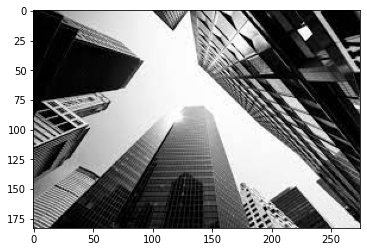

In [28]:
#@title ## Seleccione una imágen, trabajaremos con su Luminancia (Y).
#@markdown Puede utilizar una imágen propia o la mía: imageio:chelsea.png
#@markdown ---
#@markdown ### Enter an Image path:
file_path ='/content/EdifBW.png'#'/content/ImgPaintPrueba.png'
# #@param {type:"string"}
#@markdown ---
im=open_img(file_path)
#Abro la img en PNG como un arreglo
#im =open_img(file_path)
plt.imshow(im)
#Guardo Y de la img
Yim=RGB2Y(im)


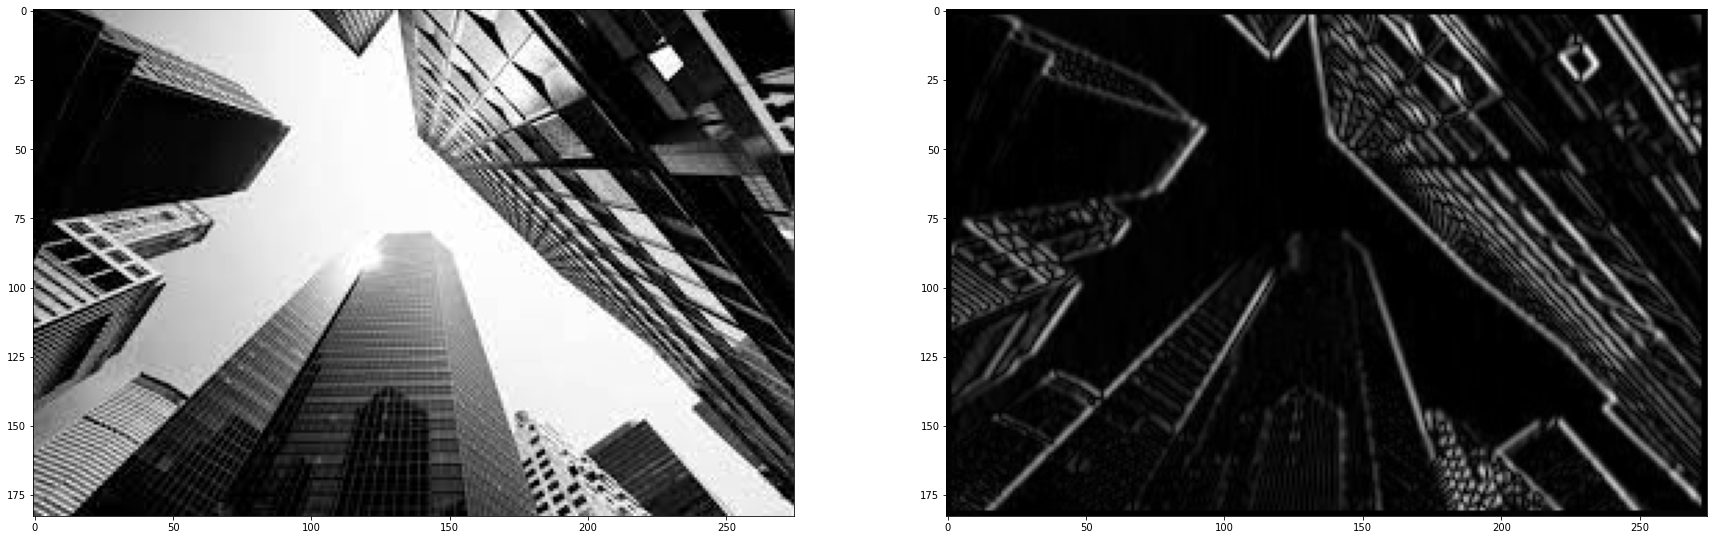

In [42]:
#@title ## Operaciones de Luminancia 
#@markdown  Seleccione los valores a modificar:

Operacion = 'Sobel 90 grados' #@param ["'Pasabajos Plano 3x3'","'Pasabajos Plano 5x5'","'Pasabajos Plano 7x7'", "'PB Bartlett 3x3'", "'PB Bartlett 5x5'", "'PB Bartlett 7x7'", "'PB Gaussiano 5x5'" , "'PB Gaussiano 7x7'", "'Detector de bordes Laplaciano v4'" ,"'Detector de bordes Laplaciano v8'", "'Detector de bordes Sobel 8 orientaciones'","'PasaBanda DOG'","'PasaBanda Prod. Ext.'","'Pasaaltos de fc 0,2'" , "'Pasaaltos de fc 0,4'","'Detector de bordes Sobel Este'","'Detector de bordes Sobel Norte'","'Filtro de Mejora 0.2'", "'Filtro de Mejora 0.4'","'Sobel 0 grados'","'Sobel 45 grados'","'Sobel 90 grados'","'Sobel 135 grados'","'Sobel 180 grados'","'Sobel 225 grados'","'Sobel 270 grados'","'Sobel 315 grados'"] {type:"raw"}
ConvImg=DoConvolution(Operacion,Yim)

plt.figure(figsize=(30, 10))
plt.subplot(1,2,1)
plt.imshow(Yim,'gray')
plt.subplot(1,2,2)
plt.imshow(ConvImg,'gray')

In [ ]:
ConvImg=DoConvolution(i,Yim)

El Kernel para la convolución con un  Pasabajos Plano  es: [[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


In [ ]:
i

'Pasabajos Plano 3x3'

El Kernel para la convolución con un  Pasabajos Plano  es: [[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]
El Kernel para la convolución con un  Pasabajos Plano  es: [[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]
El Kernel para la convolución con un  Pasabajos Plano  es: [[0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]
 [0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]
 [0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]
 [0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]
 [0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]
 [0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]
 [0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:116: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


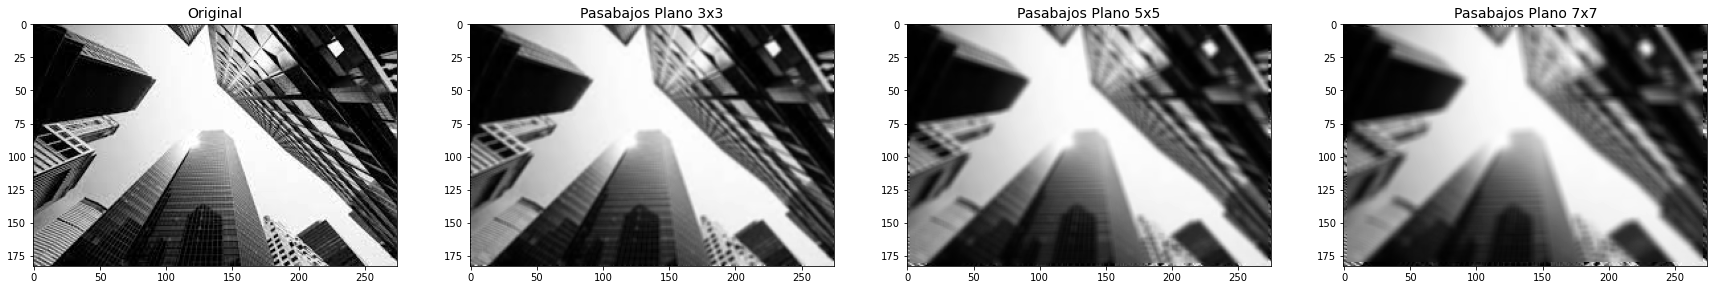

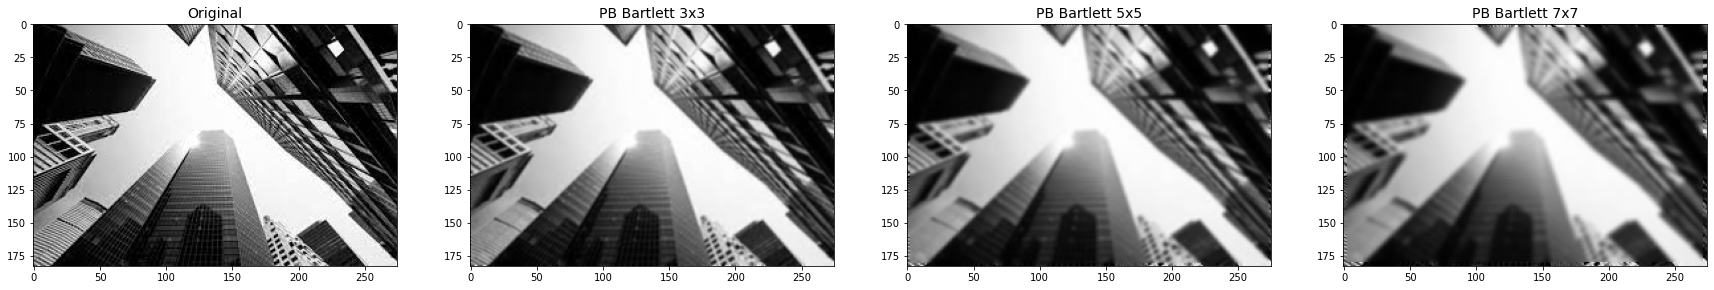

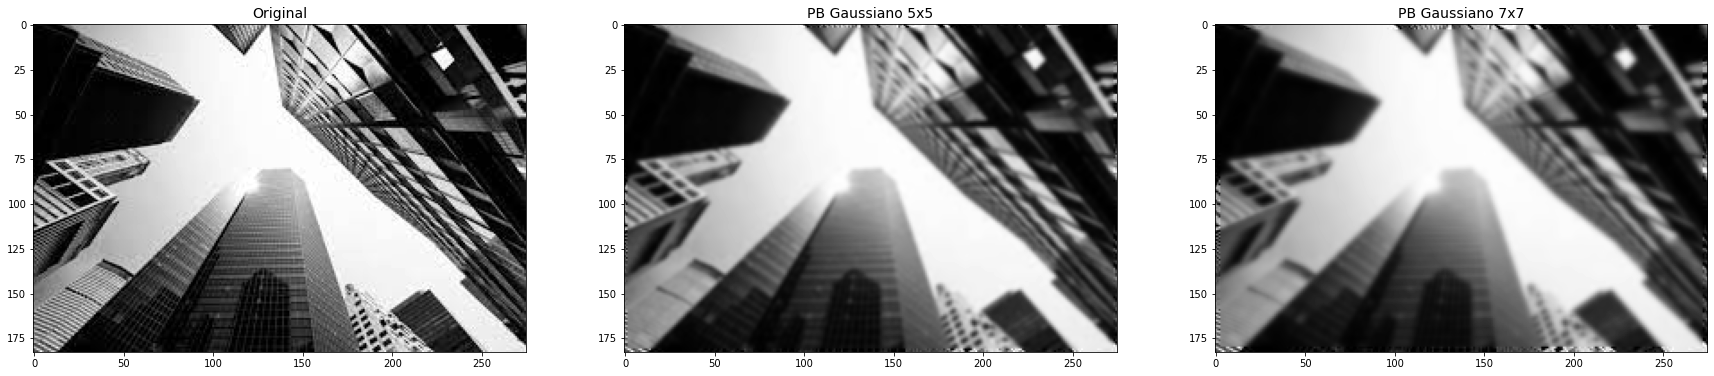

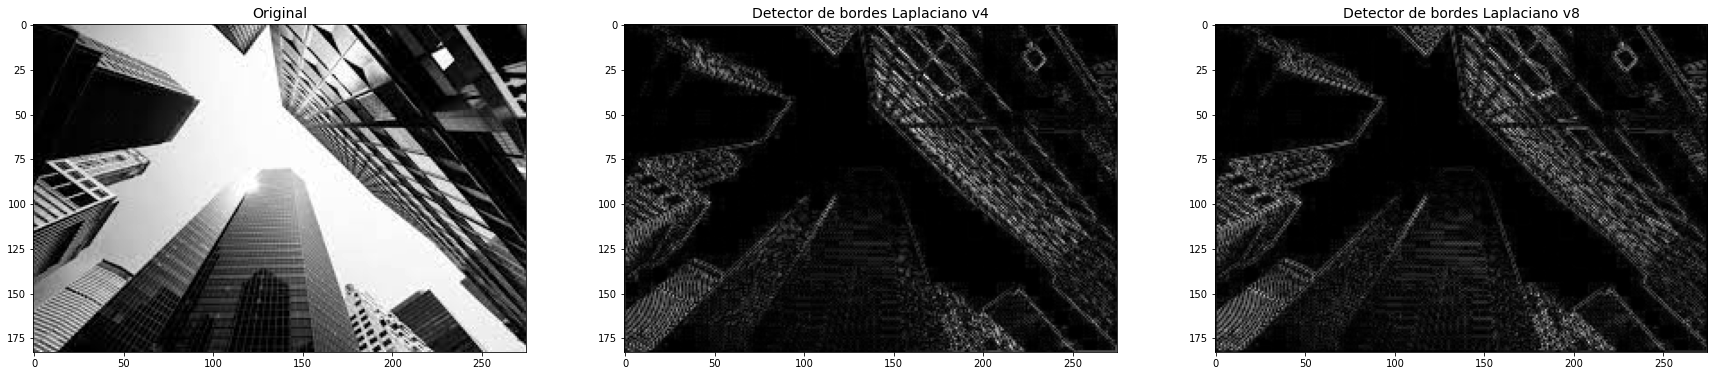

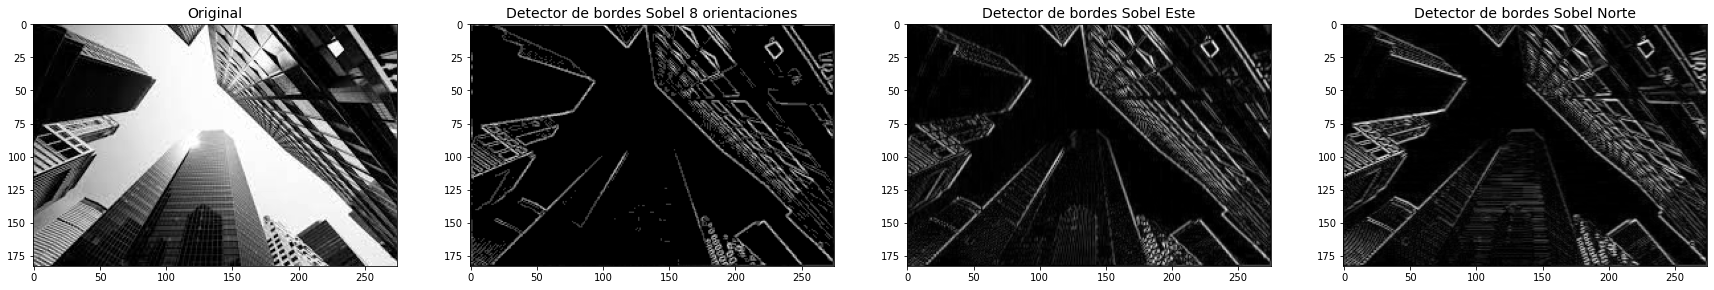

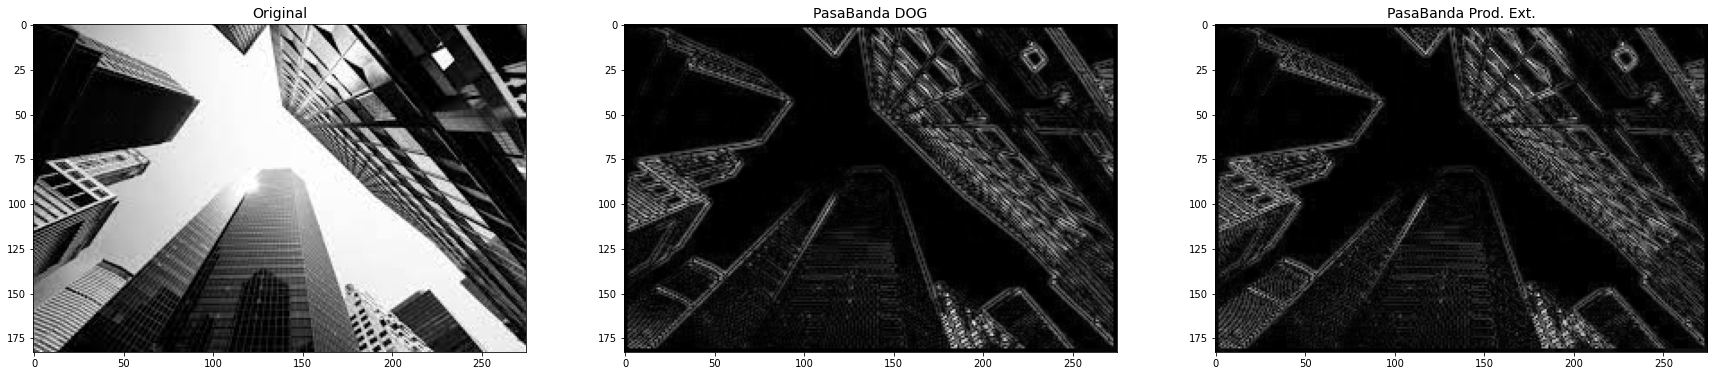

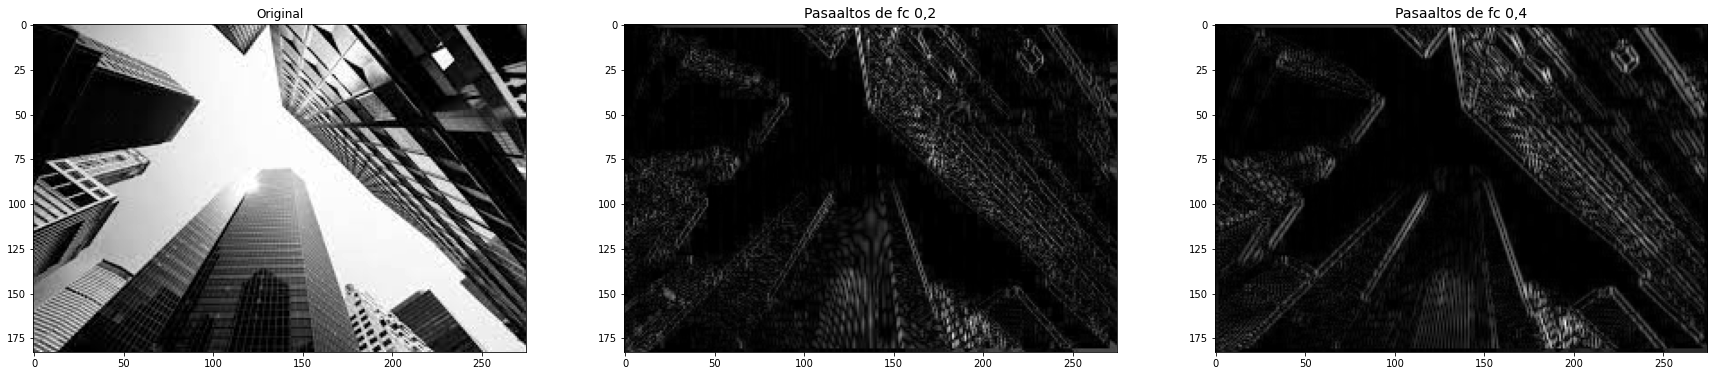

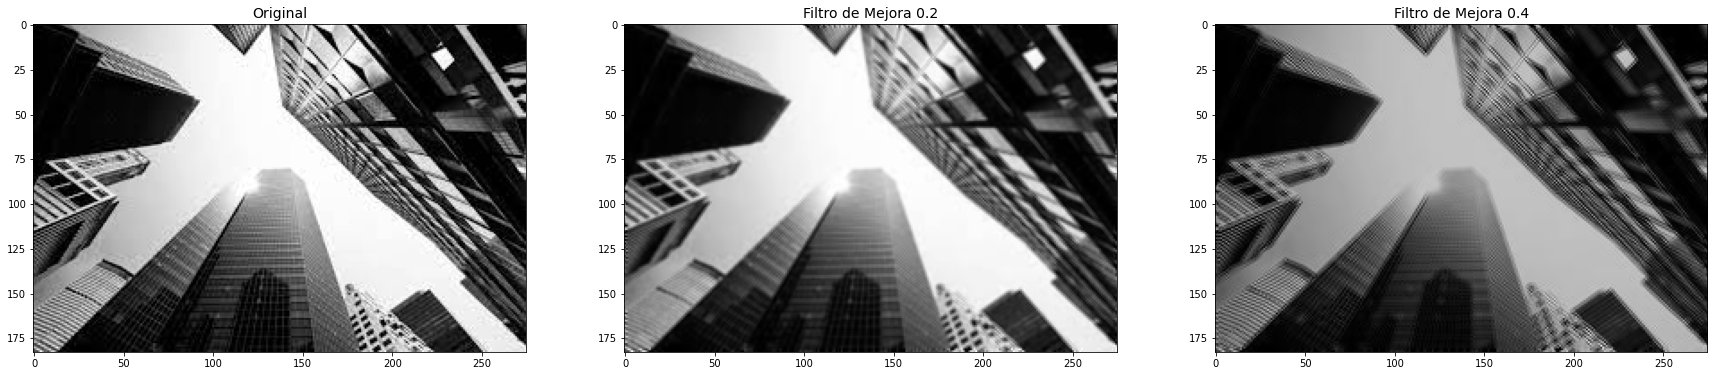

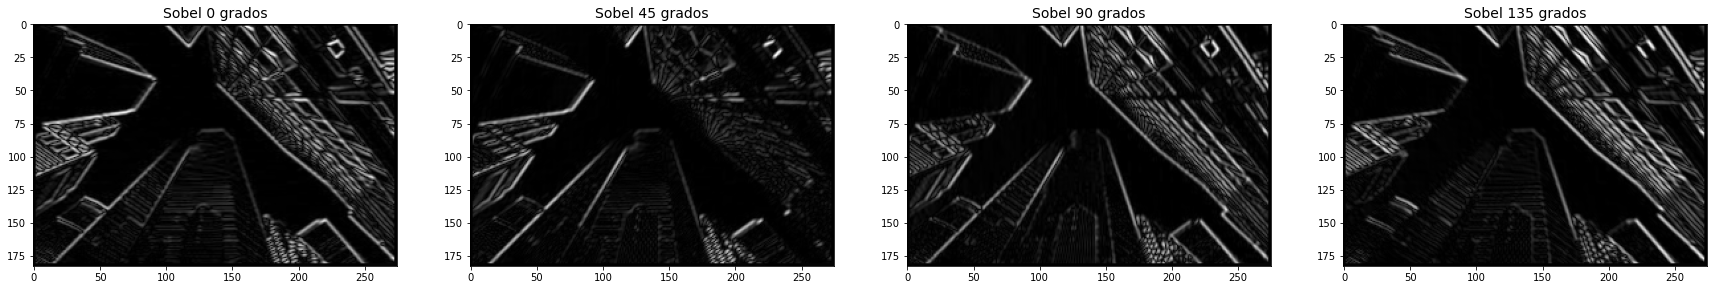

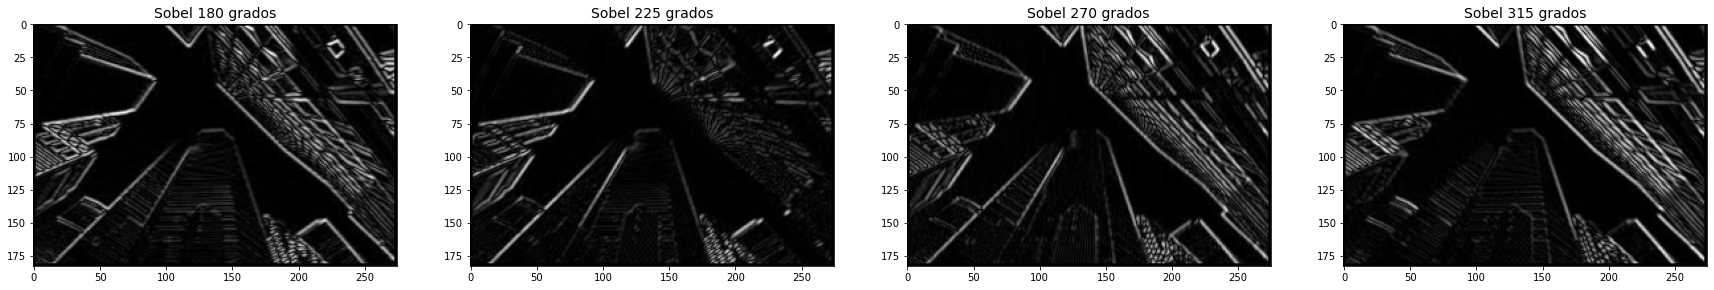

In [43]:
Filtro=['Pasabajos Plano 3x3','Pasabajos Plano 5x5','Pasabajos Plano 7x7','PB Bartlett 3x3','PB Bartlett 5x5','PB Bartlett 7x7','PB Gaussiano 5x5','PB Gaussiano 7x7', 'Detector de bordes Laplaciano v4','Detector de bordes Laplaciano v8', 'Detector de bordes Sobel 8 orientaciones','Detector de bordes Sobel Este','Detector de bordes Sobel Norte','PasaBanda DOG','PasaBanda Prod. Ext.','Pasaaltos de fc 0,2' , 'Pasaaltos de fc 0,4','Filtro de Mejora 0.2','Filtro de Mejora 0.4','Sobel 0 grados','Sobel 45 grados','Sobel 90 grados','Sobel 135 grados','Sobel 180 grados','Sobel 225 grados','Sobel 270 grados','Sobel 315 grados'] 
plt.figure(figsize=(30, 10))
plt.subplot(1,4,1)
plt.imshow(Yim,'gray')
plt.title('Original', fontsize=14)
for i in range(3):
  ConvImg=DoConvolution(Filtro[i],Yim)
  plt.subplot(1,4,i+2)
  plt.imshow(ConvImg,'gray')
  plt.title(Filtro[i], fontsize=14)

plt.figure(figsize=(30, 10))
plt.subplot(1,4,1)
plt.imshow(Yim,'gray')
plt.title('Original', fontsize=14)
j=2
for i in range(3,6):
  ConvImg=DoConvolution(Filtro[i],Yim)
  plt.subplot(1,4,j)
  plt.imshow(ConvImg,'gray')
  plt.title(Filtro[i], fontsize=14)
  j=j+1



plt.figure(figsize=(30, 10))
plt.subplot(1,3,1)
plt.imshow(Yim,'gray')
plt.title('Original', fontsize=14)
j=2
for i in range(6,8):
  ConvImg=DoConvolution(Filtro[i],Yim)
  plt.subplot(1,3,j)
  plt.imshow(ConvImg,'gray')
  plt.title(Filtro[i], fontsize=14)
  j=j+1

plt.figure(figsize=(30, 10))
plt.subplot(1,3,1)
plt.imshow(Yim,'gray')
plt.title('Original', fontsize=14)
j=2
for i in range(8,10):
  ConvImg=DoConvolution(Filtro[i],Yim)
  plt.subplot(1,3,j)
  plt.imshow(ConvImg,'gray')
  plt.title(Filtro[i], fontsize=14)

  j=j+1

plt.figure(figsize=(30, 10))
plt.subplot(1,4,1)
plt.imshow(Yim,'gray')
plt.title('Original', fontsize=14)
j=2
for i in range(10,13):
  ConvImg=DoConvolution(Filtro[i],Yim)
  plt.subplot(1,4,j)
  plt.imshow(ConvImg,'gray')
  plt.title(Filtro[i], fontsize=14)
  j=j+1

plt.figure(figsize=(30, 10))
plt.subplot(1,3,1)
plt.imshow(Yim,'gray')
plt.title('Original', fontsize=14)
j=2
for i in range(13,15):
  ConvImg=DoConvolution(Filtro[i],Yim)
  plt.subplot(1,3,j)
  plt.imshow(ConvImg,'gray')
  plt.title(Filtro[i], fontsize=14)
  j=j+1


plt.figure(figsize=(30, 10))
plt.subplot(1,3,1)
plt.imshow(Yim,'gray')
plt.title('Original')
j=2
for i in range(15,17):
  ConvImg=DoConvolution(Filtro[i],Yim)
  plt.subplot(1,3,j)
  plt.imshow(ConvImg,'gray')
  plt.title(Filtro[i], fontsize=14)
  j=j+1

plt.figure(figsize=(30, 10))
plt.subplot(1,3,1)
plt.imshow(Yim,'gray')
plt.title('Original', fontsize=14)
j=2
for i in range(17,19):
  ConvImg=DoConvolution(Filtro[i],Yim)
  plt.subplot(1,3,j)
  plt.imshow(ConvImg,'gray')
  plt.title(Filtro[i], fontsize=14)
  j=j+1


plt.figure(figsize=(30, 10))
plt.subplot(1,4,1)

j=1
for i in range(19,23):
  ConvImg=DoConvolution(Filtro[i],Yim)
  plt.subplot(1,4,j)
  plt.imshow(ConvImg,'gray')
  plt.title(Filtro[i], fontsize=14)
  j=j+1
plt.figure(figsize=(30, 10))
plt.subplot(1,4,1)
j=1
for i in range(23,27):
  ConvImg=DoConvolution(Filtro[i],Yim)
  plt.subplot(1,4,j)
  plt.imshow(ConvImg,'gray')
  plt.title(Filtro[i], fontsize=14)
  j=j+1




Análisis:
En la primer fila vemos los pasabajos planos, se ve un desenfoque que aumenta con las dimensiones del kernel, ya que cada nuevo pixel es el promediode color de sus vecinos. Lo mismo pasa en Bartlett y el Gaussiano.
En la fila de filtros Sobel se puede ver, en el caso del Sobel Este, los cambios bruscos de claro a oscuro  de la imágen en esa dirección (izquierda a derecha). Lo mismo para la dirección Norte (arriba a abajo), y una mezcla de ambos en el Sobel de 8 aristas.
Los filtros de mejora 0.2 y 0.4son filtros formados a partir de la matriz identidad en kernels mas 0.2 y 0.4 por la matriz del Laplaciano v4. 
La figura elegida es permite ver ladetección de bordes Sobel en los diferentes ángulos.
Es importante contar con un objetivo antes de realizar la selección del filtro. Es difícil generar un análisis generalizado.